# Blinkit

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
from matplotlib.gridspec import GridSpec

In [2]:
customer_feedback=pd.read_csv(r"C:\Users\Vinay Raykar\OneDrive\Documents\My Courses\Cyber Success DA & DS\All projects\Blinkit project\Blink-it data\blinkit_customer_feedback.csv")
customers = pd.read_csv(r"C:\Users\Vinay Raykar\OneDrive\Documents\My Courses\Cyber Success DA & DS\All projects\Blinkit project\Blink-it data\blinkit_customers.csv")
delivery_performance = pd.read_csv(r"C:\Users\Vinay Raykar\OneDrive\Documents\My Courses\Cyber Success DA & DS\All projects\Blinkit project\Blink-it data\blinkit_delivery_performance.csv")
inventory = pd.read_csv(r"C:\Users\Vinay Raykar\OneDrive\Documents\My Courses\Cyber Success DA & DS\All projects\Blinkit project\Blink-it data\blinkit_inventory.csv")
inventory_New = pd.read_csv(r"C:\Users\Vinay Raykar\OneDrive\Documents\My Courses\Cyber Success DA & DS\All projects\Blinkit project\Blink-it data\blinkit_inventoryNew.csv")
marketing_performance = pd.read_csv(r"C:\Users\Vinay Raykar\OneDrive\Documents\My Courses\Cyber Success DA & DS\All projects\Blinkit project\Blink-it data\blinkit_marketing_performance.csv")
order_items = pd.read_csv(r"C:\Users\Vinay Raykar\OneDrive\Documents\My Courses\Cyber Success DA & DS\All projects\Blinkit project\Blink-it data\blinkit_order_items.csv")
orders = pd.read_csv(r"C:\Users\Vinay Raykar\OneDrive\Documents\My Courses\Cyber Success DA & DS\All projects\Blinkit project\Blink-it data\blinkit_orders.csv")
products = pd.read_csv(r"C:\Users\Vinay Raykar\OneDrive\Documents\My Courses\Cyber Success DA & DS\All projects\Blinkit project\Blink-it data\blinkit_products.csv")
category_icon = pd.read_excel(r"C:\Users\Vinay Raykar\OneDrive\Documents\My Courses\Cyber Success DA & DS\All projects\Blinkit project\Blink-it data\Category_Icons.xlsx")
rating_icon = pd.read_excel(r"C:\Users\Vinay Raykar\OneDrive\Documents\My Courses\Cyber Success DA & DS\All projects\Blinkit project\Blink-it data\Rating_Icon.xlsx")


In [3]:
# Data Cleaning.

# Changing Datatype of C feedback table
customer_feedback["feedback_date"] = customer_feedback["feedback_date"].astype('datetime64[ns]')

# Changing Datatype of Customers table
customers["phone"] = customers["phone"].astype('int64')
customers["registration_date"] = customers["registration_date"].astype('datetime64[ns]')

#Changing Datatype of DP table
delivery_performance["promised_time"] = delivery_performance["promised_time"].astype('datetime64[ns]')
delivery_performance["actual_time"] = delivery_performance["actual_time"].astype('datetime64[ns]')

# Changing Datatype of Inventory table
inventory["date"] = inventory["date"].astype('datetime64[ns]')
inventory.dropna(inplace = True)

#Changing Datatype of INewtable
inventory_New["date"] = inventory_New["date"].astype('datetime64[ns]')

# Changing Datatype of MP table
marketing_performance["date"] = marketing_performance["date"].astype('datetime64[ns]')

#Changing Datatype of Orders table
orders["order_date"] = orders["order_date"].astype('datetime64[ns]')
orders["promised_delivery_time"] = orders["promised_delivery_time"].astype('datetime64[ns]')
orders["actual_delivery_time"] = orders["actual_delivery_time"].astype('datetime64[ns]')

#Changing Datatype of category Icon table
"""category_icon.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4','Unnamed: 5','Unnamed: 6','Unnamed: 7','Unnamed: 8','Unnamed: 9'], axis = 1, inplace = True)"""

"category_icon.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4','Unnamed: 5','Unnamed: 6','Unnamed: 7','Unnamed: 8','Unnamed: 9'], axis = 1, inplace = True)"

In [4]:
delivery_performance.head()

,order_id,delivery_partner_id,promised_time,actual_time,delivery_time_minutes,distance_km,delivery_status,reasons_if_delayed
0,1549769649,14983,2024-05-28 13:25:00,2024-05-28 13:27:00,2,0.98,On Time,Traffic
1,9185164487,39859,2024-09-23 13:25:00,2024-09-23 13:29:00,4,3.83,On Time,Traffic
2,5427684290,84315,2023-11-20 05:17:00,2023-11-20 05:18:00,1,2.63,On Time,Traffic
3,4898355547,14630,2023-04-16 19:01:00,2023-04-16 19:02:00,1,2.20,On Time,Traffic
4,6568151549,67714,2024-03-31 06:37:00,2024-03-31 06:39:00,2,1.30,On Time,Traffic


In [5]:
delivery_performance.dtypes

order_id                          int64
delivery_partner_id               int64
promised_time            datetime64[ns]
actual_time              datetime64[ns]
delivery_time_minutes             int64
distance_km                     float64
delivery_status                  object
reasons_if_delayed               object
dtype: object

In [6]:
delivery_performance.isnull().sum()

order_id                 0
delivery_partner_id      0
promised_time            0
actual_time              0
delivery_time_minutes    0
distance_km              0
delivery_status          0
reasons_if_delayed       0
dtype: int64

In [7]:
customers.shape

(2500, 11)

In [8]:
delivery_performance.columns.value_counts()

order_id                 1
delivery_partner_id      1
promised_time            1
actual_time              1
delivery_time_minutes    1
distance_km              1
delivery_status          1
reasons_if_delayed       1
Name: count, dtype: int64

In [9]:
inventory.dtypes

product_id                 int64
date              datetime64[ns]
stock_received             int64
damaged_stock              int64
dtype: object

In [10]:
orders['order_date'].head()

0   2024-07-17 08:34:00
1   2024-05-28 13:14:00
2   2024-09-23 13:07:00
3   2023-11-24 16:16:00
4   2023-11-20 05:00:00
Name: order_date, dtype: datetime64[ns]

In [11]:
# reference_date

**1. Who are Blinkit's most valuable customers?**

 Segment customers based on frequency, monetary value, and recency (RFM analysis).
 Identify which city or segment is the most profitable.

In [12]:
# valuable=order[["customer_id"]["order_total"].count()]

In [13]:
# Reference date = one day after latest order
reference_date = orders['order_date'].max() + pd.Timedelta(days=1)

# Group by customer and calculate RFM metrics
rfm = orders.groupby('customer_id').agg({
    'order_date': lambda x: (reference_date - x.max()).days,  # Recency
    'order_id': 'count',                                      # Frequency
    'order_total': 'sum'                                      # Monetary
}).reset_index()

rfm.columns = ['customer_id', 'Recency', 'Frequency', 'Monetary']

# Score each R, F, M from 1 (low) to 4 (high)
rfm['R_Score'] = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2, 1]).astype(int)
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 4, labels=[1, 2, 3, 4]).astype(int)
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 4, labels=[1, 2, 3, 4]).astype(int)

# Combine scores
rfm['RFM_Score'] = rfm[['R_Score', 'F_Score', 'M_Score']].sum(axis = 1)
rfm['RFM_Segment'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

# Merge with customer data
rfm = rfm.merge(customers[['customer_id', 'area', 'customer_segment']], on='customer_id', how='left')

In [14]:
rfm.head()

,customer_id,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,RFM_Segment,area,customer_segment
0,31813,26,2,5726.04,4,2,3,9,423,Sultan Pur Majra,Regular
1,61020,66,3,7844.90,4,3,4,11,434,Kurnool,New
2,119099,165,4,14768.77,3,4,4,11,344,Kavali,Inactive
3,188838,260,2,5182.04,2,2,3,7,223,Madanapalle,Inactive
4,191616,165,2,4089.96,3,2,2,7,322,Pallavaram,Regular


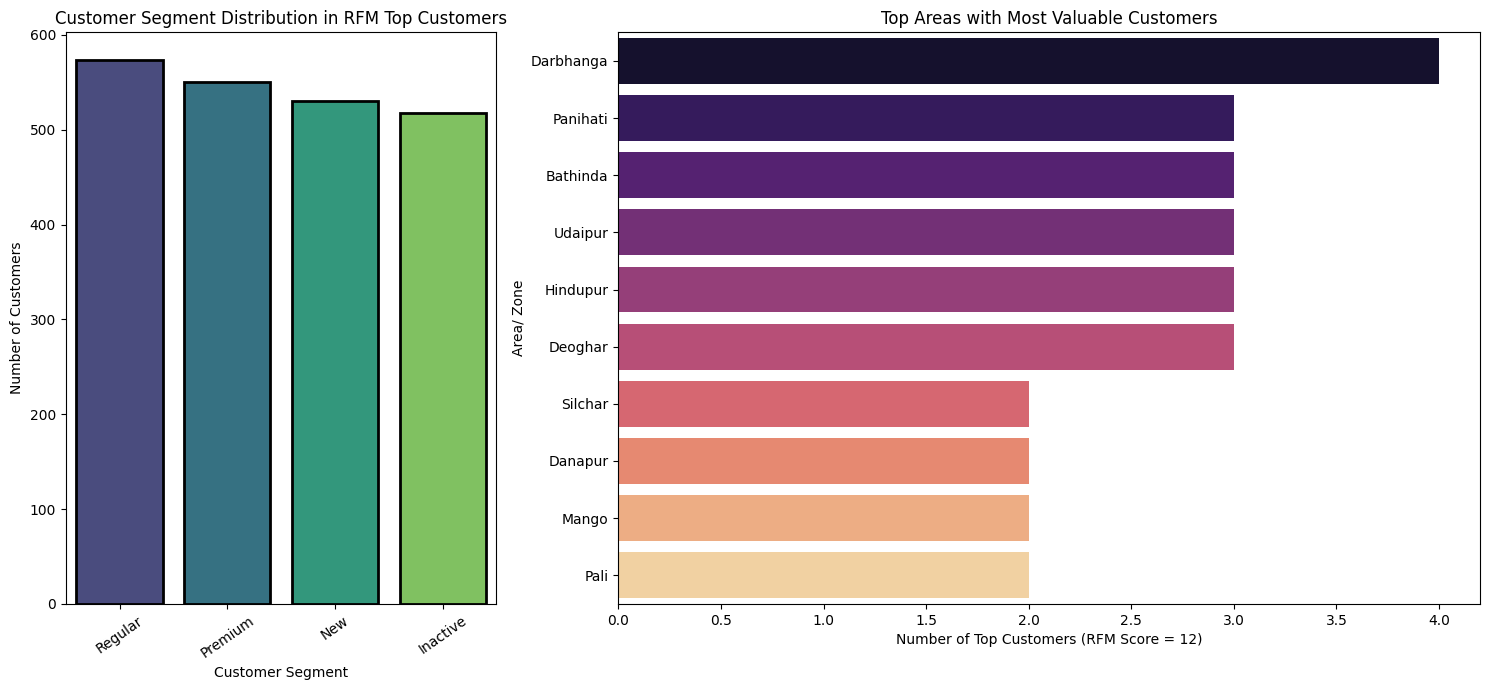

In [15]:
fig = plt.figure(figsize = (15,7))
gs = plt.GridSpec(2,2, width_ratios = [1,2])
                 
# Plot 1
ax1 = plt.subplot(gs[:,0])
sns.countplot(data=rfm, x='customer_segment', order=rfm['customer_segment'].value_counts().index,edgecolor = 'k', linewidth = 2, palette="viridis")
ax1.set_title("Customer Segment Distribution in RFM Top Customers")
ax1.set_ylabel("Number of Customers")
ax1.set_xlabel("Customer Segment")
plt.xticks(rotation=35)


# Plot 2
top_customers = rfm[rfm['RFM_Score'] == 12]
top_areas = top_customers['area'].value_counts().nlargest(10)


ax2 = plt.subplot(gs[:, 1])
sns.barplot(x=top_areas.values, y=top_areas.index, palette='magma')
ax2.set_title("Top Areas with Most Valuable Customers")
ax2.set_xlabel("Number of Top Customers (RFM Score = 12)")
ax2.set_ylabel("Area/ Zone")


plt.tight_layout()
plt.show()

**2. Who are the common trends in customer purchase behaviour?**

Analyze peak ordering times (hour, day of week).
Identify popular product categories by volume and revenue.

In [16]:
pop_cat = products.groupby('category').agg({'product_id':'count', 'price':'sum'})
pop_cat = pop_cat.rename(columns = {'product_id':'Volume','price':'Total_Price'})

In [17]:
# Extract hour and day of week for peak time analysis
orders['order_hour'] = orders['order_date'].dt.hour
orders['order_day'] = orders['order_date'].dt.day_name()

# Peak ordering times: count of orders by hour and day
peak_hour = orders.groupby('order_hour').size().reset_index(name='order_count')
peak_day = orders.groupby('order_day').size().reset_index(name='order_count')
peak_day['order_day'] = pd.Categorical(peak_day['order_day'], categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], ordered=True)
peak_day = peak_day.sort_values('order_day')

# Merge order items with products to get categories
order_details = pd.merge(order_items, products[['product_id', 'category']], on='product_id', how='left')

# Calculate revenue per order item (quantity * unitprice)
order_details['item_revenue'] = order_details['quantity'] * order_details['unit_price']

# Aggregate by category for volume and revenue
pop_categories = order_details.groupby('category').agg({'product_id':'count', 'item_revenue':'sum'}).reset_index()
pop_categories = pop_categories.rename(columns={'product_id':'Volume', 'item_revenue':'Total_Revenue'})

# Sorting By Revenue
pop_categories = pop_categories.sort_values( by = 'Total_Revenue', ascending = False).reset_index()

In [18]:
pop_categories

,index,category,Volume,Total_Revenue
0,2,Dairy & Breakfast,566,639222.19
1,9,Pharmacy,481,592368.57
2,3,Fruits & Vegetables,492,559053.08
3,8,Pet Care,501,539888.75
4,5,Household Care,509,444244.25
5,7,Personal Care,454,394894.61
6,10,Snacks & Munchies,483,394648.71
7,1,Cold Drinks & Juices,375,392717.62
8,4,Grocery & Staples,449,359937.82
9,0,Baby Care,334,348227.18


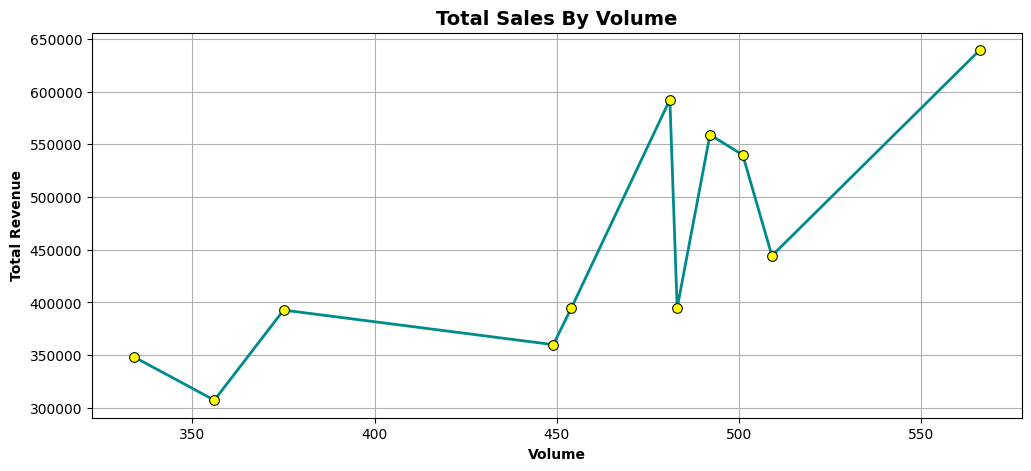

In [19]:
plt.figure(figsize=(12,5))
sns.lineplot(data = pop_categories, x = pop_categories["Volume"], y = pop_categories["Total_Revenue"], marker="o", mfc="yellow",markeredgecolor ='k', c="darkcyan",linewidth=2, ms= 7)

plt.xlabel("Volume", fontweight = 'bold', fontsize = 10)
plt.ylabel("Total Revenue", fontweight = 'bold', fontsize = 10)
plt.title("Total Sales By Volume", fontweight = 'bold', fontsize = 14)

plt.grid()
plt.show()

**• Delivery Performance Analysis**

**3. What percentage of deliveries are delayed, and which locations or delivery partners are responsible?**

 Analyze late vs. on time deliveries by city, partner, and product.


In [20]:
# Table Merged
dp_orders = pd.merge(delivery_performance[['order_id', 'delivery_partner_id', 'delivery_status', 'reasons_if_delayed']], orders[['order_id', 'customer_id', 'delivery_status', 'order_total', 'delivery_partner_id']], on ='delivery_partner_id', how = 'inner')
dp_o_c = pd.merge(dp_orders, customers[['customer_id', 'customer_name', 'area', 'pincode','customer_segment', 'total_orders']], on = 'customer_id', how = 'inner')

# 
total = len(delivery_performance)
delayed = delivery_performance['delivery_status'].str.lower().str.contains('delayed', 'late').sum()

# Overall delayed Percentage
overall_delayed = delayed / total  * 100

# percentage by city
pct_city = dp_o_c.groupby('area')['delivery_status_x'].apply(lambda x: x.str.lower().str.contains('delayed').mean() * 100).reset_index(name = 'Delay%')

# percentage by delivery man
delivery_delayed = dp_o_c.groupby('delivery_partner_id')['delivery_status_x'].apply(lambda x: x.str.lower().str.contains('delayed').mean() * 100).reset_index(name = 'Delay%')

print("Total Percentage of deliveries are delayed by",round(overall_delayed,2),"%")

Total Percentage of deliveries are delayed by 49.39 %


In [21]:
# df1 = pd.DataFrame(pct_city)
# df2 = pd.DataFrame(delivery_delayed)
# df2 = pd.merge(df1, df2
# df2

In [22]:
print("Total Percentage of deliveries delayed of city is")
round(pct_city,2).head()

Total Percentage of deliveries delayed of city is


,area,Delay%
0,Adoni,63.64
1,Agartala,66.67
2,Agra,66.67
3,Ahmedabad,50.00
4,Ahmednagar,36.84


In [23]:
print("Total Percentage of deliveries delayed of Delivery Man is")
round(delivery_delayed,2).head()

Total Percentage of deliveries delayed of Delivery Man is


,delivery_partner_id,Delay%
0,43,0.0
1,66,0.0
2,70,0.0
3,102,100.0
4,158,0.0


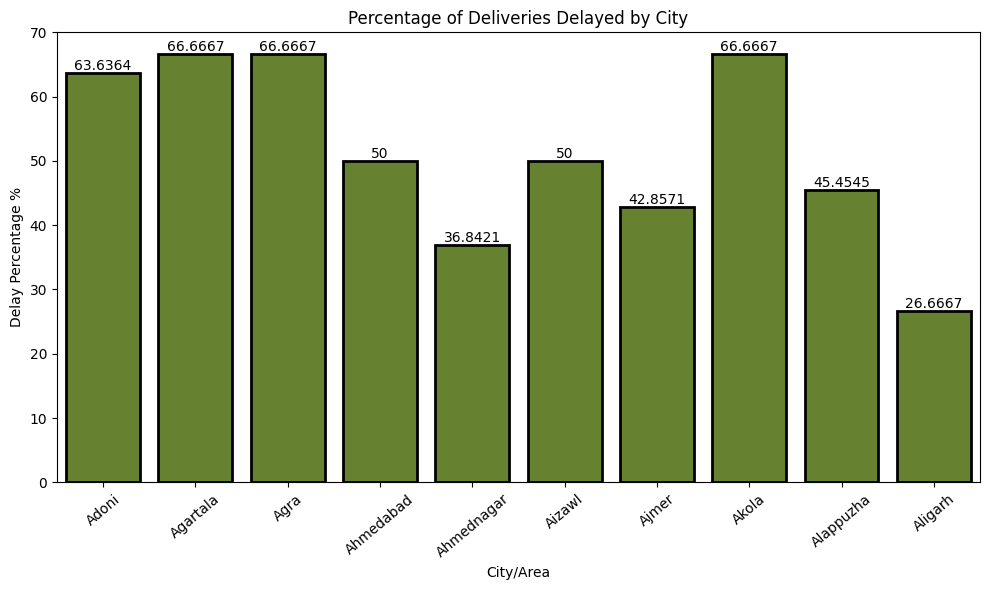

In [24]:
# Plot percentage of deliveries delayed by city
plt.figure(figsize=(10,6))
rank = sns.barplot(data=pct_city.head(10), x='area', y='Delay%', edgecolor = 'k', linewidth = 2, color = 'olivedrab')
plt.xticks(rotation=40)
plt.title('Percentage of Deliveries Delayed by City')
plt.ylabel('Delay Percentage %')
plt.xlabel('City/Area')

for bar in rank.containers:
    rank.bar_label(bar)


plt.tight_layout()
plt.show()

**4. How do delivery times affect customer feedback or repeat orders?**

 Correlate delivery time and rating/comments/retention.

In [25]:
# corr od Rating
dp_cf = pd.merge(delivery_performance,customer_feedback, on = 'order_id', how = 'inner')
corr_rating = dp_cf['actual_time'].corr(dp_cf['rating'])


# Analyze the feedback comments by delivery speed
fast_delivery_comm = dp_cf[dp_cf['actual_time'] < dp_cf['actual_time'].median()]['feedback_text']
slow_delivery_comm = dp_cf[dp_cf['actual_time'] >= dp_cf['actual_time'].median()]['feedback_text']

# find negative words for feedback comments at late delivery.
neg_words = ['delay','late','slow','wait']
slow_neg_comm = slow_delivery_comm.str.lower().str.contains('|'.join(neg_words)).sum()
comment_rating = slow_neg_comm / len(slow_delivery_comm)

# count the total order in order's table
customer_order = orders.groupby('customer_id').size().reset_index(name = 'order_count')
# merge table
dp_cf_o = pd.merge(dp_cf, orders[['order_id','customer_id']], on = ['order_id','customer_id'], how = 'left')
dp_cf_o = pd.merge(dp_cf_o, customer_order, on = 'customer_id', how = 'left')
corr_reten = dp_cf_o['actual_time'].corr(dp_cf_o['order_count'])

print('Correlation between delivery time and rating:', corr_rating)
print('Slow delivery negative comment rate:', comment_rating)
print('Correlation between delivery time and repeat orders:', corr_reten)

Correlation between delivery time and rating: 0.00388869819964741
Slow delivery negative comment rate: 0.028405422853453842
Correlation between delivery time and repeat orders: 0.00014315882771442773


In [26]:
dp_cf.head()

,order_id,delivery_partner_id,promised_time,actual_time,delivery_time_minutes,distance_km,delivery_status,reasons_if_delayed,feedback_id,customer_id,rating,feedback_text,feedback_category,sentiment,feedback_date
0,1549769649,14983,2024-05-28 13:25:00,2024-05-28 13:27:00,2,0.98,On Time,Traffic,5450964,9573071,3,The order was incorrect.,App Experience,Negative,2024-05-28
1,9185164487,39859,2024-09-23 13:25:00,2024-09-23 13:29:00,4,3.83,On Time,Traffic,482108,45477575,3,"It was okay, nothing special.",App Experience,Neutral,2024-09-23
2,5427684290,84315,2023-11-20 05:17:00,2023-11-20 05:18:00,1,2.63,On Time,Traffic,3537464,83298567,3,Product was damaged during delivery.,Delivery,Negative,2023-11-20
3,4898355547,14630,2023-04-16 19:01:00,2023-04-16 19:02:00,1,2.20,On Time,Traffic,230696,13284996,4,Highly recommended!,Product Quality,Positive,2023-04-16
4,6568151549,67714,2024-03-31 06:37:00,2024-03-31 06:39:00,2,1.30,On Time,Traffic,2259308,88866835,2,I had a bad experience.,App Experience,Negative,2024-03-31


**• Inventory Optimization**

**5. Which products frequently go out of stock or have excess inventory?**

 Detect stockouts or overstock patterns by warehouse or product.

In [27]:
# inv_prod.head()

In [28]:
inv_prod = pd.merge(inventory, products, on = 'product_id', how = 'left')
summary_stock_low = inv_prod.pivot_table(values = 'min_stock_level', index = 'product_name', aggfunc = 'mean')
summary_stock_high = inv_prod.pivot_table(values = 'max_stock_level', index = 'product_name', aggfunc = 'mean')
Overall_summary_stock = pd.merge(summary_stock_low,summary_stock_high, on = 'product_name', how = 'outer')

Overall_summary_stock = Overall_summary_stock.round(2).reset_index().head(10)
Overall_summary_stock

,product_name,min_stock_level,max_stock_level
0,Baby Food,14.65,71.67
1,Baby Wipes,20.75,77.43
2,Bananas,20.76,88.22
3,Biscuits,19.57,73.21
4,Bread,21.58,78.20
5,Butter,22.92,73.86
6,Carrots,24.52,74.70
7,Cat Food,22.80,86.89
8,Cereal,25.50,77.97
9,Cheese,19.13,81.14


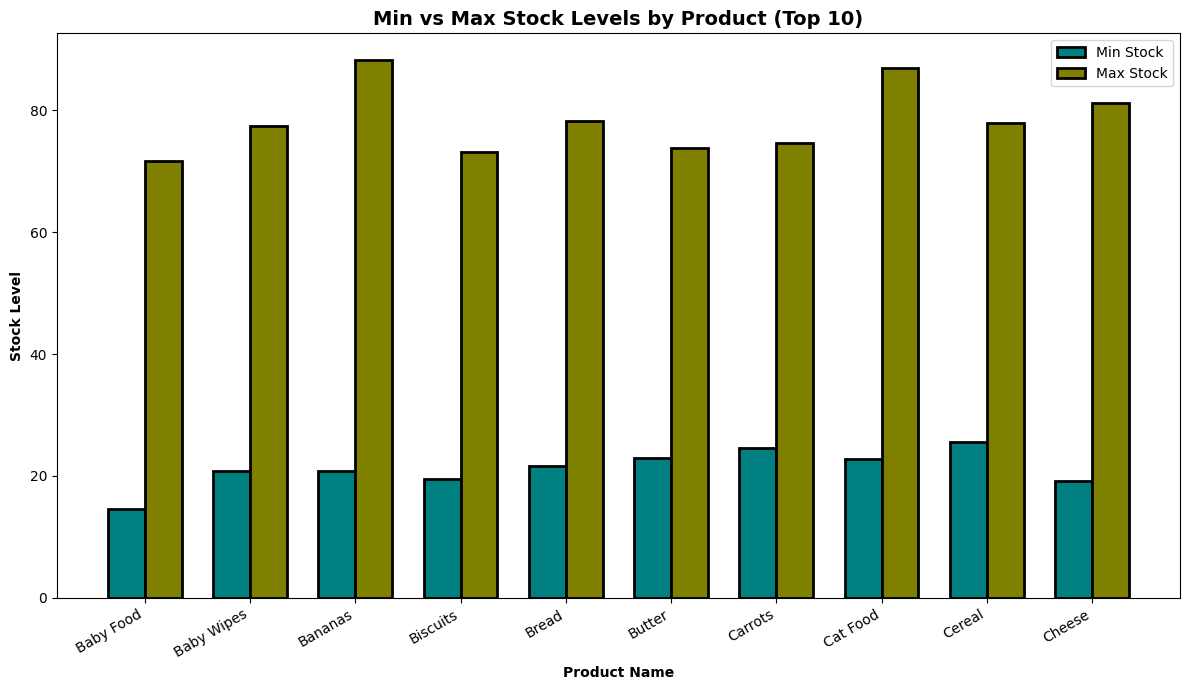

In [29]:
plt.figure(figsize=(12,7))

x = np.arange(len(Overall_summary_stock['product_name']))


width = 0.35
plt.bar(x - width/2,  Overall_summary_stock['min_stock_level'],width, label = "Min Stock", edgecolor = 'k', linewidth = 2, color = 'teal')
plt.bar(x + width/2, Overall_summary_stock['max_stock_level'],width, label = 'Max Stock', edgecolor = 'k', linewidth = 2, color = 'olive')


plt.title('Min vs Max Stock Levels by Product (Top 10)', fontweight = "bold", fontsize = 14)
plt.ylabel('Stock Level', fontweight = "bold", fontsize = 10)
plt.xlabel('Product Name', fontweight = "bold", fontsize = 10)
plt.xticks(x,Overall_summary_stock['product_name'], rotation = 30, ha = 'right')
plt.legend()


plt.tight_layout()
plt.show()

**6. Top selling products always available across locations?**

 Crosscheck demand vs. stock availability

In [30]:
# Merging 3 table for connecting their columns
oi_o = pd.merge(order_items, orders[['customer_id','order_id']], on = 'order_id' , how = 'inner')
oi_o_p = pd.merge(products[['product_id', 'product_name', 'category', 'min_stock_level', 'max_stock_level']],oi_o, on = 'product_id' , how = 'inner')
oi_o_p_c = pd.merge(oi_o_p, customers[['customer_id','area','total_orders','avg_order_value']], on = 'customer_id' , how = 'inner')

# Pivot table for finding out top selling products by location
top_sell = oi_o_p_c.pivot_table(values = 'unit_price', index = ['product_name','area'], aggfunc = "sum", margins = True)
top_sell = top_sell.sort_values(by = 'unit_price', ascending = False).head(10)
top_sell

unit_price
product_name   area                     
All                           2465789.50
Toilet Cleaner Gandhinagar       4176.33
Pet Treats     Gandhinagar       2992.10
Lotion         Machilipatnam     2823.32
Vitamins       Kamarhati         2809.97
               Nizamabad         2740.16
Dish Soap      Rajkot            2693.54
Cola           Etawah            2692.58
Dog Food       Sambalpur         2622.35
Bread          Ahmednagar        2620.79

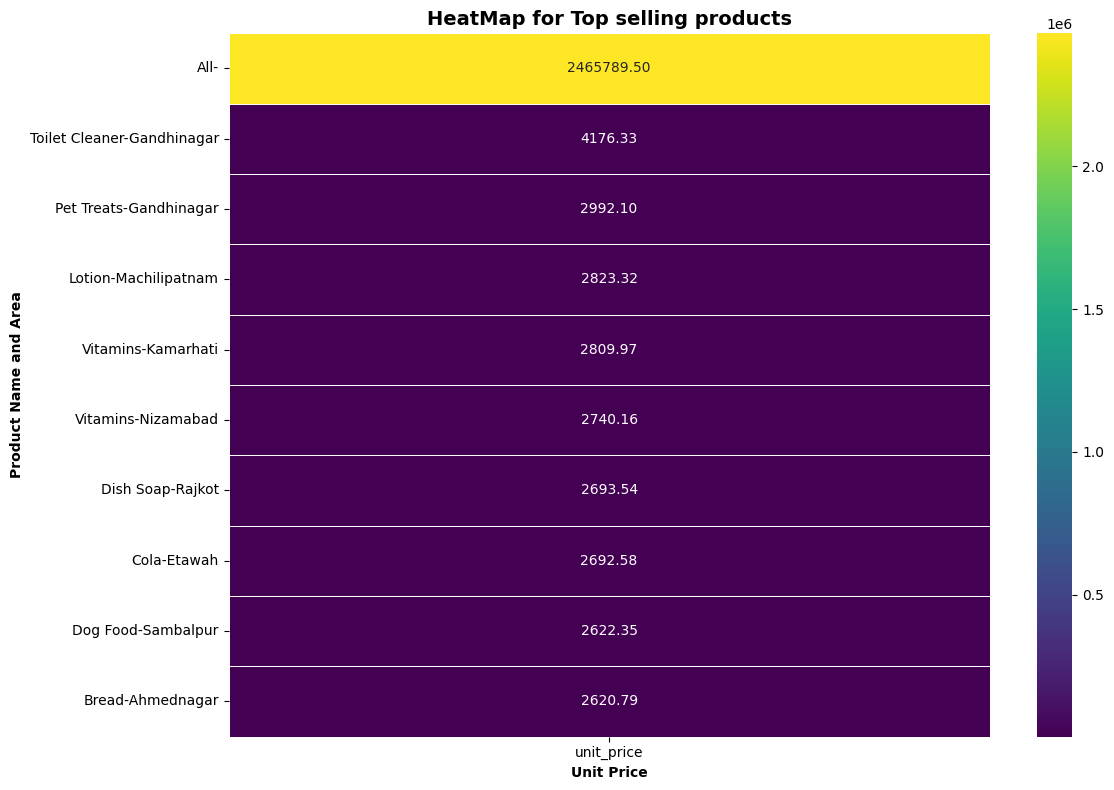

In [31]:
plt.figure(figsize = (12,8))

sns.heatmap(top_sell, annot = True, fmt = '0.2f', cmap = 'viridis', linewidth = 0.5)

plt.title('HeatMap for Top selling products', fontweight = "bold", fontsize = 14)
plt.ylabel('Product Name and Area', fontweight = "bold", fontsize = 10)
plt.xlabel('Unit Price', fontweight = "bold", fontsize = 10)

plt.tight_layout()
plt.show()

**• Marketing Performance**

**7. Which marketing channels or campaigns bring the most high value customers?**

 Analyze cost vs. revenue per campaign.


In [32]:
marketing_performance['roas'] = marketing_performance['revenue_generated'] / marketing_performance['spend']
valuable_cust = marketing_performance.groupby(['channel', 'campaign_name'])['roas'].mean().sort_values(ascending = False).reset_index()

print(f'The Channel "{valuable_cust['channel'][0]}" and the Campaign Name "{valuable_cust['campaign_name'][0]}" bring the most high value customers.')
valuable_cust = valuable_cust.head(10)
valuable_cust

# Group by channel
channel = valuable_cust.groupby('channel')['roas'].sum().reset_index()
channel

The Channel "Email" and the Campaign Name "Referral Program" bring the most high value customers.


,channel,roas
0,Email,15.555027
1,SMS,4.963909
2,Social Media,5.214550


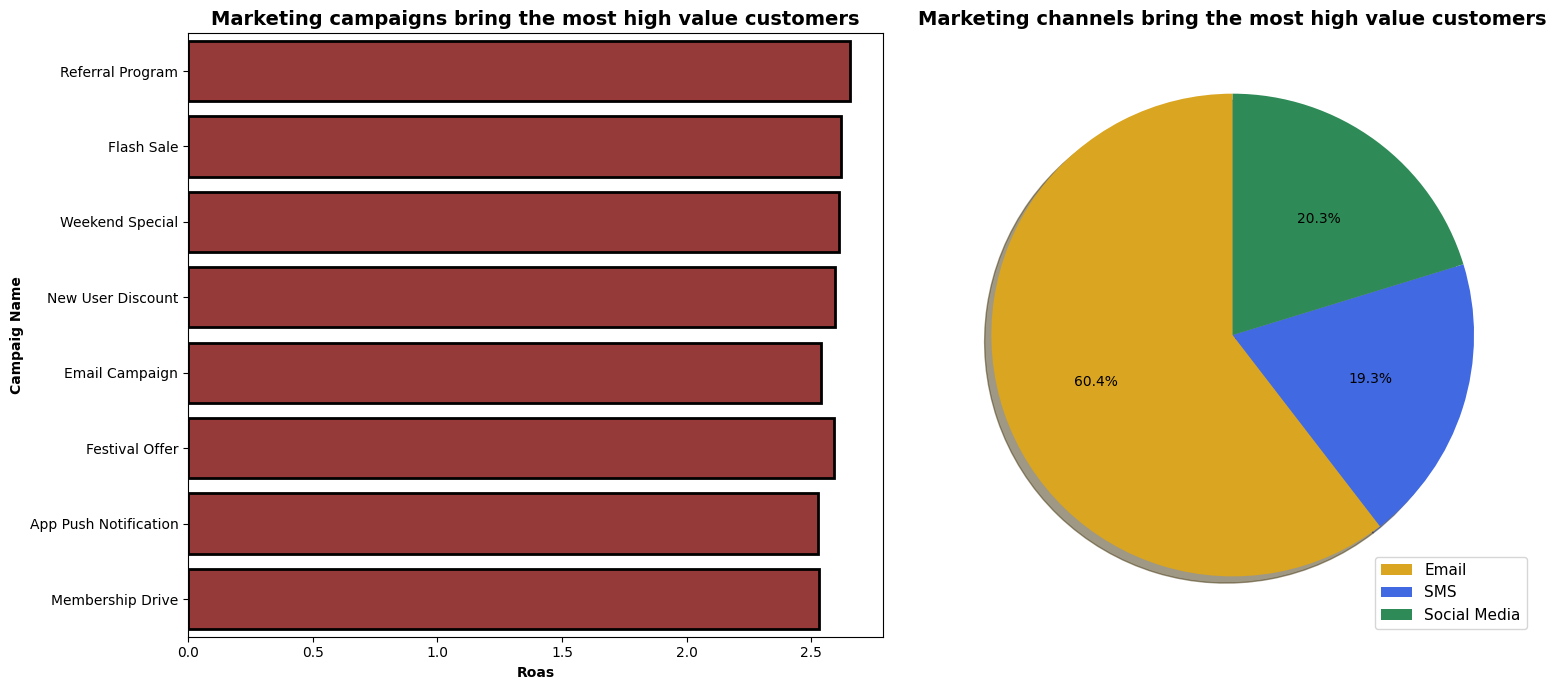

In [33]:
fig = plt.figure(figsize=(16,7))
gs = plt.GridSpec(2,2)


# PLot 1 Horizontal Bar
ax1 = plt.subplot(gs[:, 0])
sns.barplot(data = valuable_cust, x = valuable_cust['roas'], y = valuable_cust['campaign_name'], edgecolor = 'k', linewidth = 2, color = 'brown', errorbar = None)

ax1.set_title('Marketing campaigns bring the most high value customers', fontweight = "bold", fontsize = 14)
ax1.set_xlabel('Roas', fontweight = "bold", fontsize = 10)
ax1.set_ylabel('Campaig Name', fontweight = "bold", fontsize = 10)


# PLot 2 PIE
ax2 = plt.subplot(gs[:,1])
plt.pie(channel['roas'], autopct = "%1.1f%%", startangle = 90, shadow = True, colors = ['goldenrod','royalblue','seagreen'], explode = [0.0,0.0,0.0])
ax2.set_title('Marketing channels bring the most high value customers', fontweight = "bold", fontsize = 14)
ax2.legend(labels = channel['channel'], loc = 'lower right', fontsize = 11)

plt.tight_layout()
plt.show()

**8. What is the ROI of marketing campaigns across cities?**

Compare spend and conversion metrics geographically.


In [34]:
marketing_performance.head()

,campaign_id,campaign_name,date,target_audience,channel,impressions,clicks,conversions,spend,revenue_generated,roas
0,548299,New User Discount,2024-11-05,Premium,App,3130,163,78,1431.85,4777.75,3.336767
1,390914,Weekend Special,2024-11-05,Inactive,App,3925,494,45,4506.34,6238.11,1.384296
2,834385,Festival Offer,2024-11-05,Inactive,Email,7012,370,78,4524.23,2621.00,0.579325
3,241523,Flash Sale,2024-11-05,Inactive,SMS,1115,579,86,3622.79,2955.00,0.815670
4,595111,Membership Drive,2024-11-05,New Users,Email,7172,795,54,2888.99,8951.81,3.098595


In [35]:
marketing_performance['ROI (%)'] = ((marketing_performance['revenue_generated'] - marketing_performance['spend']) / marketing_performance['spend']) * 100
mp_ct = pd.merge(marketing_performance, customers[['customer_id','customer_name','area','customer_segment','total_orders','avg_order_value']], left_on = 'target_audience', right_on = 'customer_segment', how = 'left')
ROI_city = mp_ct.groupby('area')['ROI (%)'].mean().reset_index()
ROI_city = ROI_city.head(10).round(3)
ROI_city

,area,ROI (%)
0,Adoni,139.975
1,Agartala,138.379
2,Agra,138.151
3,Ahmedabad,137.243
4,Ahmednagar,139.844
5,Aizawl,137.243
6,Ajmer,137.243
7,Akola,140.279
8,Alappuzha,137.243
9,Aligarh,141.807


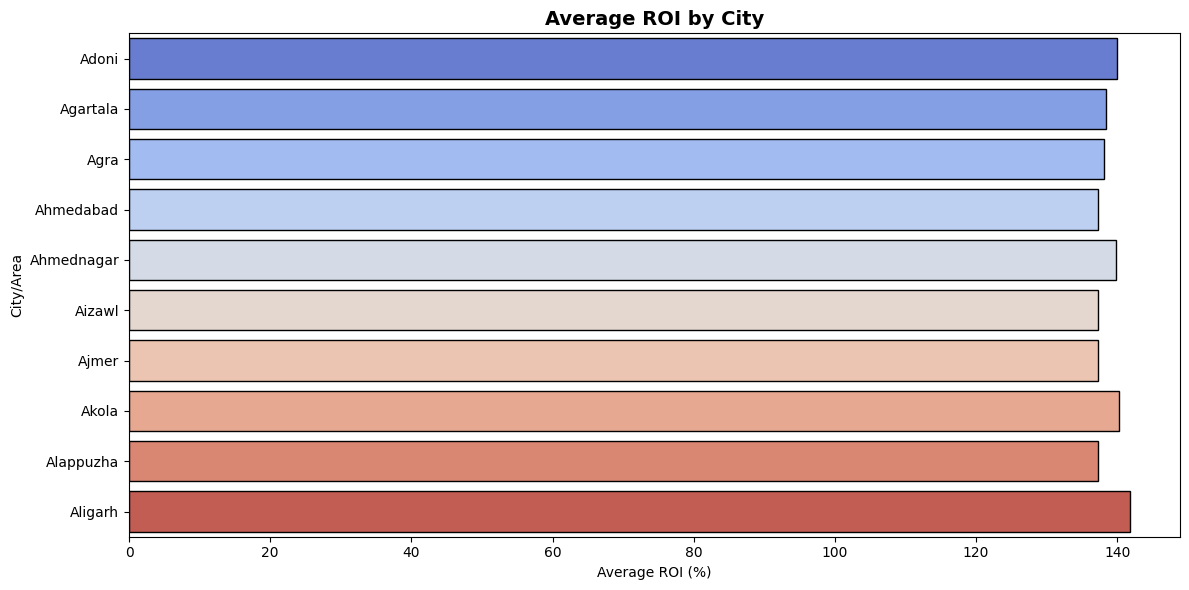

In [36]:
plt.figure(figsize=(12,6))

sns.barplot(x='ROI (%)', y='area', data=ROI_city, palette='coolwarm', edgecolor = 'k')
plt.title('Average ROI by City', fontweight='bold', fontsize=14)
plt.xlabel('Average ROI (%)')
plt.ylabel('City/Area')

plt.tight_layout()
plt.show()


**• Customer Feedback Insights**

**9. What are the top issues mentioned by customers in feedback?**

 Perform text analysis/sentiment analysis on reviews.

In [37]:
top_issues = customer_feedback[(customer_feedback['sentiment'] == 'Negative') & 
            (customer_feedback['feedback_text'].notnull()) & 
            (customer_feedback['feedback_text'].str.strip != '')].sort_values(by = 'rating', ascending = True).head(20)
top_issues

,feedback_id,order_id,customer_id,rating,feedback_text,feedback_category,sentiment,feedback_date
1812,8638304,9664390656,16420489,1,Delivery was late and I was unhappy.,Product Quality,Negative,2023-08-09
1823,8551149,3242700095,84468124,1,Taste was not as expected.,Customer Service,Negative,2024-10-14
1830,8655854,8318806722,67696145,1,The packaging was poor.,Delivery,Negative,2024-07-25
1843,6873205,2006434350,20956158,1,The order was incorrect.,Customer Service,Negative,2023-06-24
1877,3303179,3187042843,8651281,1,Delivery was late and I was unhappy.,Product Quality,Negative,2024-01-01
1879,7174582,881900445,34567918,1,Taste was not as expected.,Customer Service,Negative,2024-08-06
1718,4210815,3217749279,40643232,1,Very disappointed with the quality.,Customer Service,Negative,2023-09-29
1720,5483280,222955546,51661209,1,Customer service was not helpful.,App Experience,Negative,2023-09-27
1676,6014791,7146572423,80954112,1,I had a bad experience.,Product Quality,Negative,2023-06-01
1680,9712922,5183577434,2134827,1,Not worth the price I paid.,Customer Service,Negative,2024-01-03


**10. Is there a link between negative feedback and specific products, delivery times, or order experience?**

 Join feedback with orders and delivery data.

In [38]:
# Table Merged
cf_oi = pd.merge(customer_feedback, order_items[['order_id','product_id']], on = 'order_id', how = 'inner')
cf_oi_prod = pd.merge(cf_oi, products[['product_id', 'product_name', 'category']], on = 'product_id', how = 'left')
cf_oi_prod_dp = pd.merge(cf_oi_prod, delivery_performance[['order_id', 'delivery_partner_id', 'promised_time', 'actual_time', 'delivery_time_minutes', 'distance_km', 'delivery_status', 'reasons_if_delayed']], on = ['order_id'], how = 'inner')
cf_oi_prod_dp.head()

neg_fb = cf_oi_prod_dp[(cf_oi_prod_dp['sentiment'] == 'Negative') & 
        (cf_oi_prod_dp['product_name'].notna()) & 
        (cf_oi_prod_dp['delivery_time_minutes'].notna()) &
        (cf_oi_prod_dp['feedback_category'].notna()) &
        (cf_oi_prod_dp['feedback_text'].str.strip != '')]

neg_feedback = neg_fb[['sentiment','product_name','delivery_time_minutes','feedback_text']]

neg_feedback.head(10).sort_values(by = 'delivery_time_minutes', ascending = False)

,sentiment,product_name,delivery_time_minutes,feedback_text
16,Negative,Toothpaste,13,I had a bad experience.
12,Negative,Popcorn,13,Items were missing from my order.
13,Negative,Vitamins,12,Customer service was not helpful.
21,Negative,Toilet Cleaner,12,The order was incorrect.
11,Negative,Cough Syrup,8,Not worth the price I paid.
5,Negative,Lotion,3,Product was damaged during delivery.
4,Negative,Bread,2,I had a bad experience.
0,Negative,Orange Juice,2,The order was incorrect.
26,Negative,Baby Wipes,2,Product was damaged during delivery.
2,Negative,Nuts,1,Product was damaged during delivery.


**• Customer Insights & Segmentation**

**11. Which customer segments contribute the most to revenue and have the highest frequency of orders?**

 Use customer demographics + RFM (Recency, Frequency, Monetary) segmentation.

In [39]:
oi_o.head()

,order_id,product_id,quantity,unit_price,customer_id
0,1961864118,642612,3,517.03,30065862
1,1549769649,378676,1,881.42,9573071
2,9185164487,741341,2,923.84,45477575
3,9644738826,561860,1,874.78,88067569
4,5427684290,602241,2,976.55,83298567


In [40]:
import numpy as  np

# table merged
oi_o = pd.merge(order_items, orders, on = 'order_id', how = 'inner')

# Time span for recency orders
reference_time = oi_o['order_date'].max() + pd.Timedelta(days = 1)

#  Calculate RFM
rfm = oi_o.groupby('customer_id').agg({
    'order_date' : lambda a: (reference_time - a.max()).days,
    'order_id' : 'count',
    'unit_price' : 'sum'}).rename(columns = {'order_date' : 'Recency', 'order_id':'Frequency', 'unit_price':'Monetary'})


# Labels score the RFM

def assign_series(series, ascending = True, bins = 5):
    #compute quantiles for bins edge
    quantiles = series.quantile(np.linspace(0,1, bins + 1)).unique()
    quantiles = np.sort(quantiles)

    labels = list(range(1, len(quantiles)))
    if not ascending:
        labels = labels[::-1]

    return pd.cut(series, bins= quantiles, labels = labels, include_lowest =True)

rfm['R_score'] = assign_series(rfm['Recency'], ascending = True, bins =5)
rfm['F_score'] = assign_series(rfm['Frequency'], ascending = False, bins =5)
rfm['M_score'] = assign_series(rfm['Monetary'], ascending = False, bins =5)

#Combine all score in a segment
rfm['RFM_segment'] =rfm['R_score'].astype('str') + rfm['F_score'].astype('str') + rfm['M_score'].astype('str')

# Merge RFM+ customers
customer_RFM = pd.merge(rfm, customers, on = 'customer_id', how = 'left')

# Analyse Customers
analyse_segment = customer_RFM.groupby(['customer_id','customer_segment','RFM_segment']).agg({'Frequency':'sum','Monetary':'sum'}).reset_index()

In [41]:
rfm.head(10)

,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_segment
customer_id,,,,,,,
31813,26,2,1601.66,1,3,2,132
61020,66,3,2293.48,2,2,1,221
119099,165,4,1342.16,3,1,2,312
188838,260,2,1370.95,4,3,2,432
191616,165,2,1638.03,3,3,2,332
211163,149,3,937.37,3,2,3,323
243838,336,3,1012.92,4,2,3,423
376144,114,5,2664.64,2,1,1,211
408590,322,1,397.55,4,3,5,435


In [42]:
analyse_segment.head()

,customer_id,customer_segment,RFM_segment,Frequency,Monetary
0,31813,Regular,132,2,1601.66
1,61020,New,221,3,2293.48
2,119099,Inactive,312,4,1342.16
3,188838,Inactive,432,2,1370.95
4,191616,Regular,332,2,1638.03


**12. What are the differences in order behaviour across cities or PIN codes?**

 Geo map with filters for frequency, avg. basket size, and feedback score.

In [43]:
customer_feedback.head()

,feedback_id,order_id,customer_id,rating,feedback_text,feedback_category,sentiment,feedback_date
0,2234710,1961864118,30065862,4,"It was okay, nothing special.",Delivery,Neutral,2024-07-17
1,5450964,1549769649,9573071,3,The order was incorrect.,App Experience,Negative,2024-05-28
2,482108,9185164487,45477575,3,"It was okay, nothing special.",App Experience,Neutral,2024-09-23
3,4823104,9644738826,88067569,4,The product met my expectations.,App Experience,Neutral,2023-11-24
4,3537464,5427684290,83298567,3,Product was damaged during delivery.,Delivery,Negative,2023-11-20


In [44]:
# oi_o_c.head()

In [45]:
# Merging order_items, orders and customers table
oi_o_c = pd.merge(oi_o[['order_id','product_id','customer_id','order_date']],customers[['customer_id','area','pincode','total_orders','avg_order_value']], on = 'customer_id', how = 'inner')
# New column for revenue
oi_o_c['Revenue'] = oi_o_c['total_orders'] * oi_o_c['avg_order_value']
# Joined Customer Feedback table
oi_o_c_cf = pd.merge(oi_o_c,customer_feedback, on =['order_id','customer_id'], how = 'left')

#Order behaviour across cities or PIN codes
order_behav = oi_o_c_cf.groupby(['area','pincode']).agg(Order_count =('order_id','count'),
                                                     Total_Revenue = ('Revenue','sum'),
                                                    Avg_basket_size=('Revenue','mean'),
                                                    Feedback_score = ('rating','mean')).reset_index()

order_behav_sorted = order_behav.round(2).sort_values(by ='Total_Revenue', ascending = False). head(10)
order_behav_sorted

,area,pincode,Order_count,Total_Revenue,Avg_basket_size,Feedback_score
1090,Karimnagar,638908,7,197525.72,28217.96,3.29
1537,Ongole,989821,6,178796.82,29799.47,3.33
1886,Sikar,555117,5,175074.00,35014.80,3.80
1447,Nanded,425857,5,162804.60,32560.92,3.20
1781,Saharanpur,260071,4,151701.60,37925.40,3.25
1012,Jorhat,23557,6,146896.20,24482.70,3.33
1987,Tezpur,49861,5,145410.75,29082.15,3.60
2027,Thoothukudi,796020,4,144981.60,36245.40,3.25
1289,Mahbubnagar,251772,7,144892.44,20698.92,2.71
364,Bhopal,402853,5,144353.60,28870.72,4.00


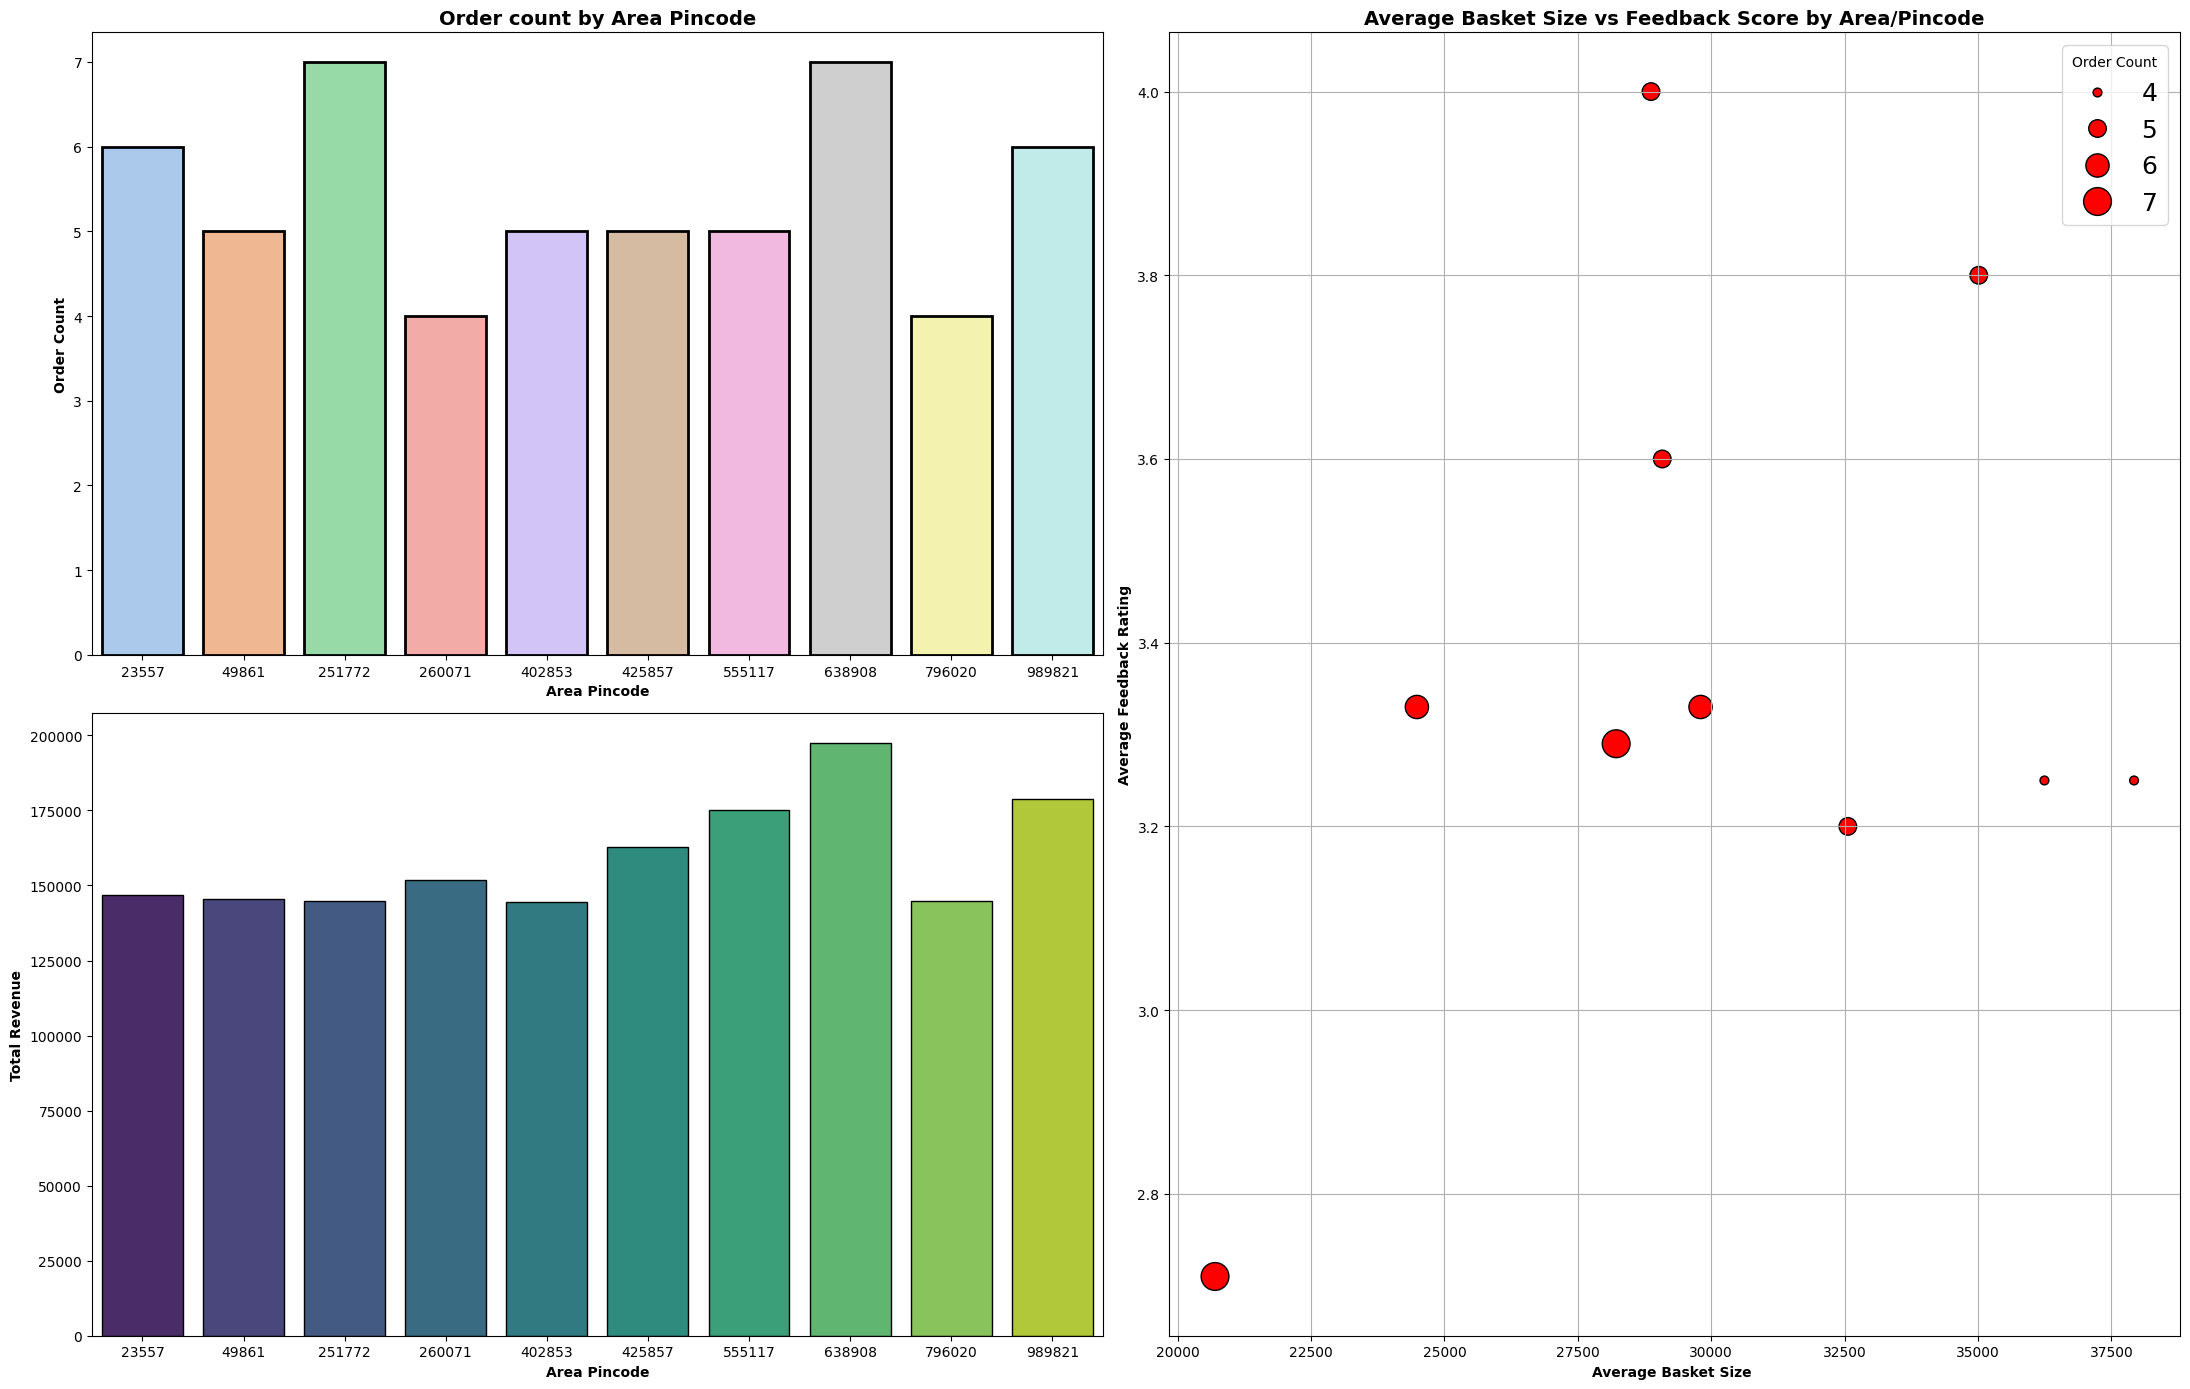

In [46]:
fig = plt.figure(figsize=(22,14))
gs = plt.GridSpec(2,4)


# PLot 1 Horizontal Bar
ax1 = plt.subplot(gs[0, :2])
sns.barplot(data = order_behav_sorted, x='pincode', y='Order_count', palette='pastel', edgecolor= 'k', linewidth = 2)

ax1.set_title('Order count by Area Pincode', fontweight='bold', fontsize=14)
ax1.set_xlabel('Area Pincode', fontweight = "bold", fontsize = 10)
ax1.set_ylabel('Order Count', fontweight = "bold", fontsize = 10)


# PLot 2 PIE
ax2 = plt.subplot(gs[1,:2])
sns.barplot(data = order_behav_sorted.sort_values(by = 'Total_Revenue', ascending = True), x='pincode', y='Total_Revenue', palette='viridis', edgecolor = 'k')
ax2.set_xlabel('Area Pincode', fontweight = "bold", fontsize = 10)
ax2.set_ylabel('Total Revenue', fontweight = "bold", fontsize = 10)


# Scatter Plot: Avg Basket Size vs Feedback Score
ax3 = plt.subplot(gs[:, 2:])
sns.scatterplot(data = order_behav_sorted, x='Avg_basket_size', y='Feedback_score', size = 'Order_count' , sizes = (40,400), edgecolor = 'k', s = 50, linewidth = 1, color = 'r')

ax3.set_title('Average Basket Size vs Feedback Score by Area/Pincode', fontweight='bold', fontsize=14)
ax3.set_xlabel('Average Basket Size ', fontweight = "bold", fontsize = 10)
ax3.set_ylabel('Average Feedback Rating', fontweight = "bold", fontsize = 10)
ax3.grid()
ax3.legend(title = "Order Count", fontsize = 18)


plt.tight_layout()
plt.show()

**13. What patterns exist in customer ordering times (day of week, hour of day)?**


In [47]:
# Make a columns of 'weekday' and 'hour'
oi_o_c['Day_Of_Week'] = oi_o_c['order_date'].dt.weekday
oi_o_c['Hour_Of_Day'] = oi_o_c['order_date'].dt.hour

ordering_time = oi_o_c.groupby('customer_id').agg(
    Mean_Day_OfWeek=('Day_Of_Week', 'mean'),
    Mode_Day_OfWeek=('Day_Of_Week', lambda x: x.mode().iloc[0] if not x.mode().empty else None),
    Mean_Hour_OfDay=('Hour_Of_Day', 'mean'),
    Mode_Hour_OfDay=('Hour_Of_Day', lambda x: x.mode().iloc[0] if not x.mode().empty else None)
)
ordering_time.round(3).head(10).reset_index()

,customer_id,Mean_Day_OfWeek,Mode_Day_OfWeek,Mean_Hour_OfDay,Mode_Hour_OfDay
0,31813,3.000,3,8.000,3
1,61020,4.333,2,15.000,14
2,119099,4.000,4,9.750,4
3,188838,0.500,0,9.000,4
4,191616,2.000,0,5.000,3
5,211163,5.000,4,14.667,10
6,243838,1.667,1,15.000,10
7,376144,3.600,6,6.800,0
8,408590,1.000,1,16.000,16
9,469006,3.333,5,8.333,3


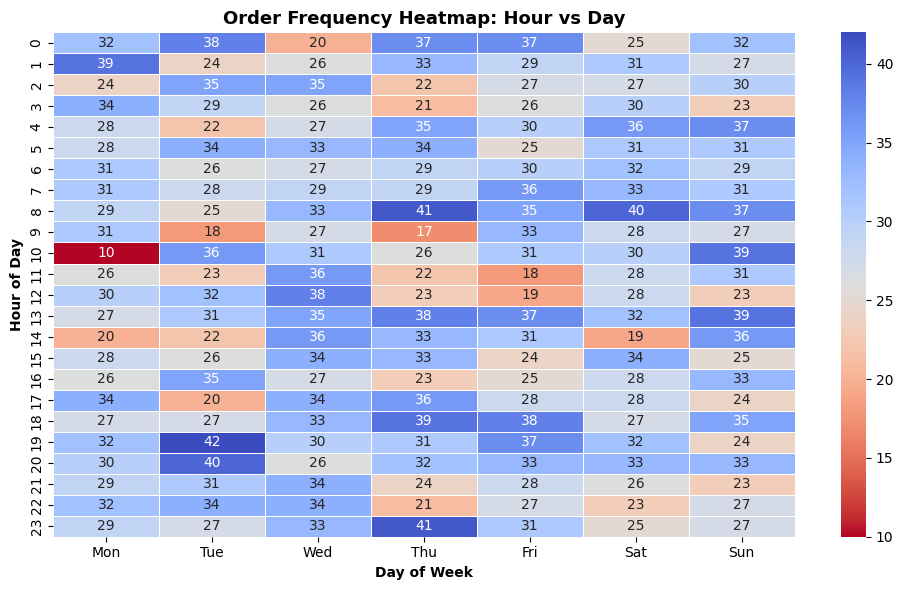



                               Analysis Volume of customer's order in Week as well as Time


In [48]:
#
# Count the orders per ( hour/ week)
heat_map = oi_o_c.pivot_table(values = "customer_id",
                              index = "Hour_Of_Day",
                              columns = "Day_Of_Week",
                              aggfunc = "count")

# plot week days
day_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
heat_map.columns = day_labels[:heat_map.shape[1]]

# Visualization
plt.figure(figsize=(10,6))
sns.heatmap(heat_map, annot = True, cmap = 'coolwarm_r', fmt = 'd', linewidth = 0.5)
plt.title('Order Frequency Heatmap: Hour vs Day', fontweight = "bold", fontsize = 13)
plt.xlabel('Day of Week', fontweight = "bold")
plt.ylabel('Hour of Day', fontweight = "bold")
plt.tight_layout()
plt.show()


print("\n")
print("                               Analysis Volume of customer's order in Week as well as Time")

**• Order Patterns & Trends** 

**14. Which product categories drive the most revenue vs. volume?**


In [49]:
# oi_o_c = pd.merge(oi_o[['order_id','product_id','customer_id']],customers[['customer_id','area','pincode','total_orders','avg_order_value','Revenue']], on = 'customer_id', how = 'inner')
# oi_o_c.drop(columns = ['Day_Of_Week','Hour_Of_Day'], inplace = True)

# Add column revenue by quantity * price
oi_o_p['Revenue'] = oi_o_p['quantity'] * oi_o_p['unit_price']

# Group by category to compare volume vs Revenue
prod_cat = oi_o_p.groupby('category').agg(Volume = ('product_id','count'),
                                            Revenue = ('Revenue','sum')).sort_values(by = 'Volume', ascending = False).reset_index()
prod_cat

,category,Volume,Revenue
0,Dairy & Breakfast,566,639222.19
1,Household Care,509,444244.25
2,Pet Care,501,539888.75
3,Fruits & Vegetables,492,559053.08
4,Snacks & Munchies,483,394648.71
5,Pharmacy,481,592368.57
6,Personal Care,454,394894.61
7,Grocery & Staples,449,359937.82
8,Cold Drinks & Juices,375,392717.62
9,Instant & Frozen Food,356,307212.65


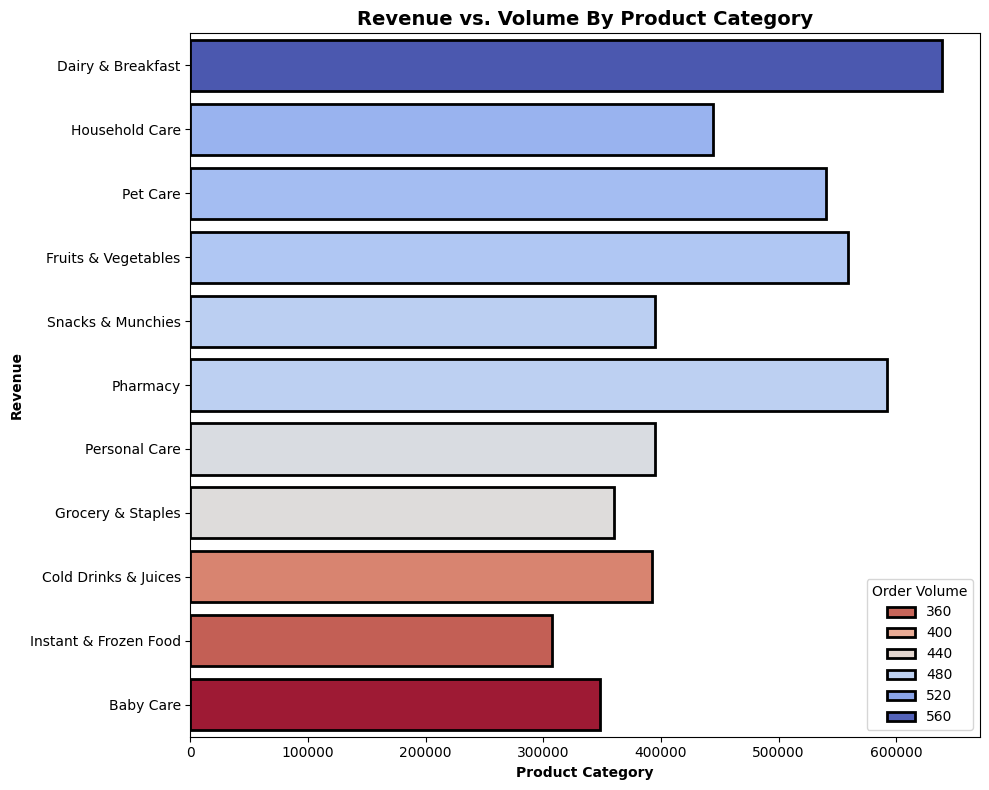

In [59]:
# prod_cat = prod_cat.reset_index()

plt.figure(figsize = (10,8))

# colors = ['#bc0c1c'] + ['steelblue'] * 10
sns.barplot(data =prod_cat,  y= prod_cat['category'], x = prod_cat['Revenue'], hue = prod_cat['Volume'],palette = 'coolwarm_r', edgecolor = 'k', linewidth = 2)

plt.title('Revenue vs. Volume By Product Category', fontweight='bold', fontsize=14)
plt.xlabel('Product Category', fontweight='bold')
plt.ylabel('Revenue', fontweight='bold')
plt.legend(title = 'Order Volume', fontsize = 10)

plt.tight_layout()
plt.show()


**15. What is the average order value (AOV) trend over time and how does it vary by city or customer type?**

In [60]:
# Merging Table by inner join
o_oi = pd.merge(orders[['order_id','customer_id','order_date','delivery_status','order_total','payment_method','delivery_partner_id','order_hour',]], order_items , on = 'order_id', how = 'inner')
o_oi_c = pd.merge(o_oi, customers , on = 'customer_id', how = 'inner')


# Add new column of revenue
o_oi_c['Revenue'] = o_oi_c['quantity'] * o_oi_c['unit_price']

#total revenue by 'order_id','area','customer_segment','order_date'
order_reve = o_oi_c.groupby(['order_id','area','customer_segment','order_date']).agg(Order_Revenue =('Revenue','sum')).reset_index()

# Extract order_date in 'month year'
order_reve['Year_Month'] = order_reve['order_date'].dt.to_period('M')

# Find avg of average order value
AOV = order_reve.groupby(['area','customer_segment','Year_Month']).agg(Avg_Order_Revenue = ('Order_Revenue','mean')).sort_values(by = 'Avg_Order_Revenue', ascending = False).reset_index()
AOV = AOV.head(15)                         
AOV

,area,customer_segment,Year_Month,Avg_Order_Revenue
0,Nizamabad,Regular,2023-04,2987.94
1,Jamshedpur,Premium,2024-03,2987.94
2,Bareilly,Inactive,2024-03,2987.94
3,Jalna,New,2024-07,2987.94
4,Madurai,Regular,2024-04,2987.94
5,Shivpuri,Premium,2024-03,2983.68
6,Allahabad,Regular,2024-05,2983.68
7,Gandhinagar,Regular,2023-04,2983.68
8,Jamalpur,New,2024-01,2983.68
9,Guwahati,Premium,2023-10,2983.68


In [52]:
AOV.dtypes

area                    object
customer_segment        object
Year_Month           period[M]
Avg_Order_Revenue      float64
dtype: object

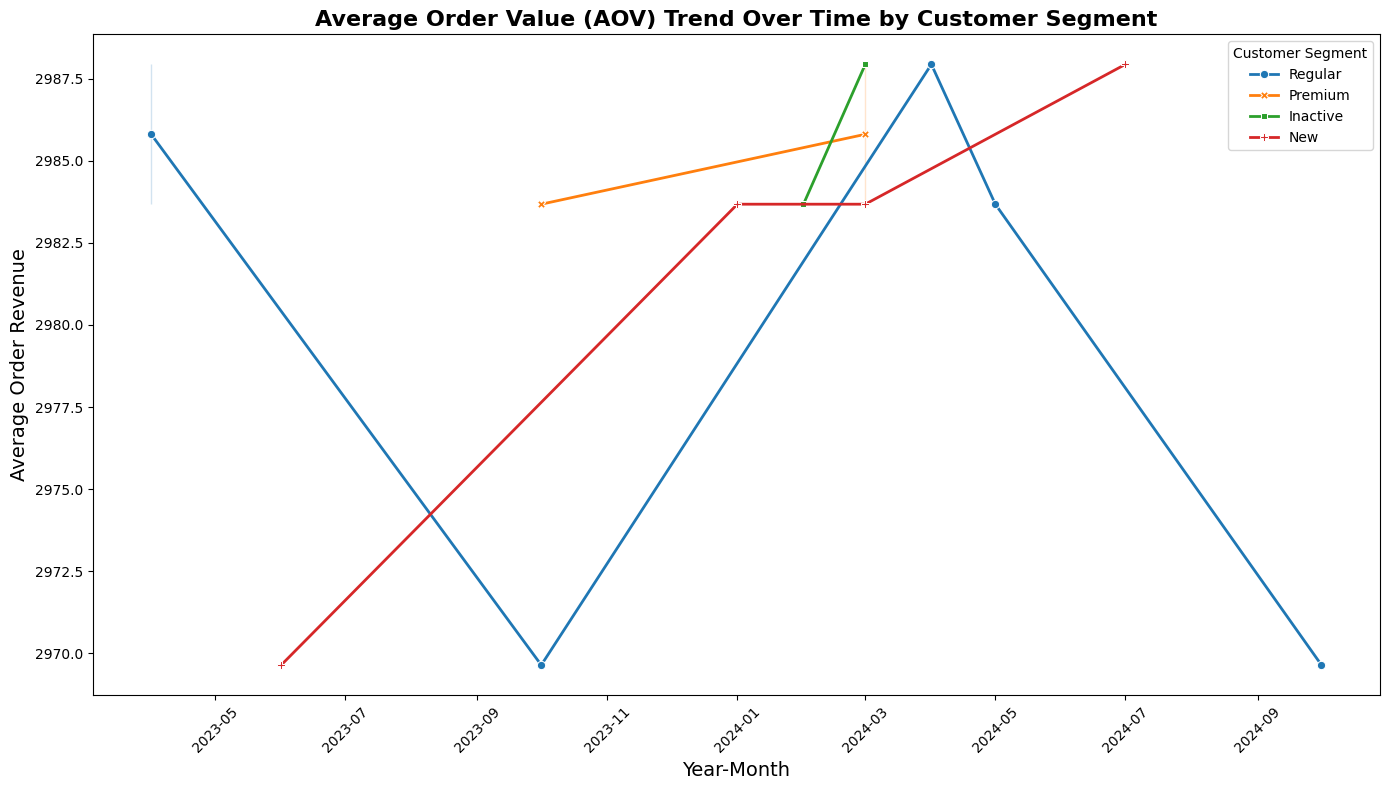

In [62]:
AOV['Year_Month'] = AOV['Year_Month'].astype('datetime64[ns]')
plt.figure(figsize = (14,8))
sns.lineplot(data = AOV, x = AOV['Year_Month'], y = AOV['Avg_Order_Revenue'],
             style = "customer_segment",
             markers = True,
             linewidth = 2,
             hue = 'customer_segment',
             dashes = False)

plt.title('Average Order Value (AOV) Trend Over Time by Customer Segment', fontsize=16, fontweight='bold')
plt.xlabel('Year-Month', fontsize=14)
plt.ylabel('Average Order Revenue', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title = "Customer Segment")

plt.tight_layout()
plt.show()


**16. Identify top 10 fastmoving and slow-moving products based on sales and delivery turnaround time**

In [54]:
# Table merged of order_items, oreders and products
o_oi = pd.merge(orders[['order_id','customer_id','order_date','actual_delivery_time','delivery_status','order_total','payment_method','delivery_partner_id','order_hour',]], order_items , on = 'order_id', how = 'inner')
o_oi_p = pd.merge(o_oi, products , on = 'product_id', how = 'inner')

# Column for revenue
o_oi_p['Revenue'] = o_oi_p['quantity'] * o_oi_p['unit_price']

# added column as Delivery_Time_days
o_oi_p['Delivery_Time_days'] = o_oi_p['order_date'] - o_oi_p['actual_delivery_time']

top10 = o_oi_p.groupby('product_name').agg(Sales = ('Revenue','sum'),
                                          Avg_Delivery_Time = ('Delivery_Time_days','mean')).reset_index()

# Top 10 Fastmoving Products
top10_fast = top10.sort_values(by = 'Avg_Delivery_Time', ascending = False).round(1).head(10).reset_index(drop = True)


# Top 10 Slowmoving Products
top10_slow = top10.sort_values(by = 'Avg_Delivery_Time', ascending = True).round(2).head(10).reset_index(drop = True)


print("Top 10 Fast moving Products\n")
top10_fast

Top 10 Fast moving Products



,product_name,Sales,Avg_Delivery_Time
0,Cereal,24021.8,-1 days +23:43:10.909090910
1,Butter,106843.3,-1 days +23:42:17.260273973
2,Frozen Pizza,47783.3,-1 days +23:42:06.136363637
3,Cola,132367.4,-1 days +23:42:03.716814160
4,Tomatoes,44812.7,-1 days +23:41:55.384615385
5,Instant Noodles,32801.6,-1 days +23:41:54.857142858
6,Iced Tea,71171.2,-1 days +23:41:45
7,Milk,33534.5,-1 days +23:41:34.285714286
8,Spinach,25233.6,-1 days +23:41:31.428571429
9,Frozen Vegetables,59165.6,-1 days +23:41:26.865671642


In [55]:
print("\n\nTop 10 slow moving Products\n")
top10_slow



Top 10 slow moving Products



,product_name,Sales,Avg_Delivery_Time
0,Ice Cream,55899.99,-1 days +23:36:38.400000
1,Lemonade,14977.80,-1 days +23:37:11.428571429
2,Diapers,52015.98,-1 days +23:37:37.674418605
3,Nuts,67024.13,-1 days +23:39:25.714285715
4,Onions,138858.42,-1 days +23:39:26.250000
5,Potatoes,92859.84,-1 days +23:39:32.389380531
6,Shampoo,49675.89,-1 days +23:39:36.750000
7,Cheese,78519.56,-1 days +23:39:36.976744187
8,Rice,22524.08,-1 days +23:39:43.018867925
9,Chocolates,49619.92,-1 days +23:39:43.125000


**17. Which cities or zones experience the highest delivery delays?**

In [56]:
# Table Merged
c_o = pd.merge(customers[['customer_id','area','customer_segment','total_orders','avg_order_value']],orders[['order_id','customer_id','order_date','order_total','order_hour']], on = 'customer_id', how = 'inner')
c_o_dp = pd.merge(c_o,delivery_performance, on = 'order_id', how = 'inner')
        
# zones experience the highest delivery delays
delay = c_o_dp[c_o_dp['delivery_time_minutes'] > 0]
zones = delay.groupby('area').agg(Delay_in_Minutes = ('delivery_time_minutes','sum')).sort_values(by = 'Delay_in_Minutes', ascending = False)
zones.head(10)

,Delay_in_Minutes
area,
Orai,294
Gandhinagar,225
Ghaziabad,223
Agra,221
Etawah,205
Thoothukudi,201
Bathinda,193
Deoghar,186
Udaipur,184


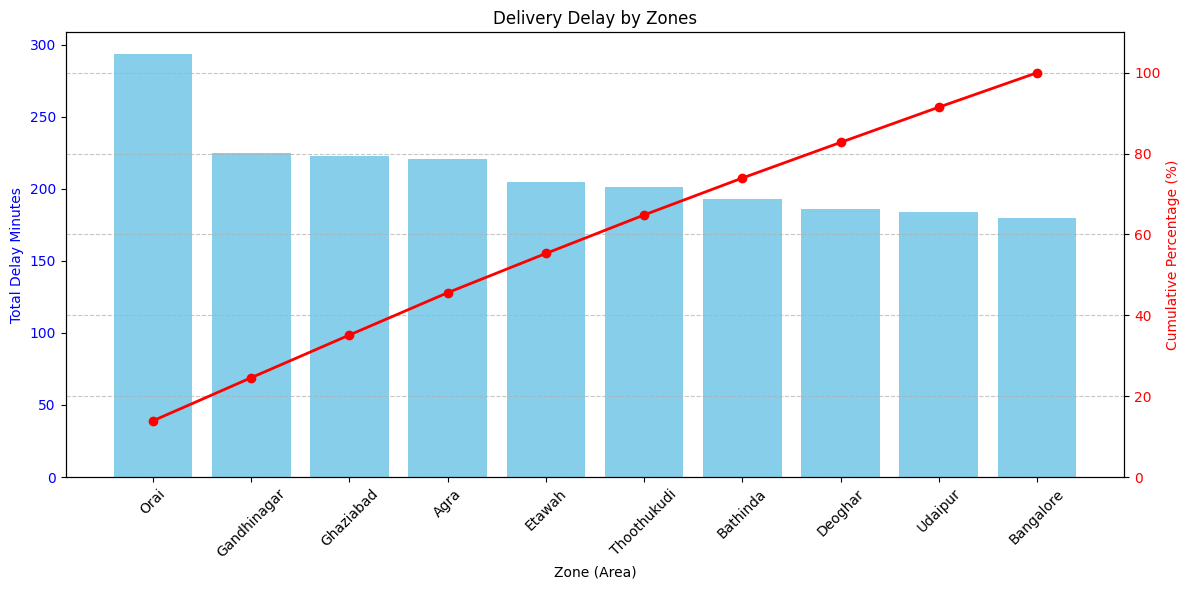

In [57]:

zones_sorted = zones.sort_values(by='Delay_in_Minutes', ascending=False).head(10)

# Calculate cumulative sum and cumulative percentage
zones_sorted['Cumulative_Sum'] = zones_sorted['Delay_in_Minutes'].cumsum()
zones_sorted['Cumulative_Percent'] = 100 * zones_sorted['Cumulative_Sum'] / zones_sorted['Delay_in_Minutes'].sum()

# Plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot
ax1.bar(zones_sorted.index, zones_sorted['Delay_in_Minutes'], color='skyblue')
ax1.set_xlabel('Zone (Area)')
ax1.set_ylabel('Total Delay Minutes', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
plt.xticks(rotation=45)

# Line plot
ax2 = ax1.twinx()
ax2.plot(zones_sorted.index, zones_sorted['Cumulative_Percent'], color='red', marker='o', linestyle='-', linewidth=2)
ax2.set_ylabel('Cumulative Percentage (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim(0, 110)

plt.title('Delivery Delay by Zones')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [58]:
zones_sorted

,Delay_in_Minutes,Cumulative_Sum,Cumulative_Percent
area,,,
Orai,294,294,13.920455
Gandhinagar,225,519,24.573864
Ghaziabad,223,742,35.132576
Agra,221,963,45.596591
Etawah,205,1168,55.303030
Thoothukudi,201,1369,64.820076
Bathinda,193,1562,73.958333
Deoghar,186,1748,82.765152
Udaipur,184,1932,91.477273
